# CAPSTONE 2:

# **SUPERMARKET TARGET DEMOGRAPHIC AND TREND ANALYSIS**

By: Kresna Dewa Kumbara

![Image of Yaktocat](https://img.freepik.com/free-photo/man-woman-with-medical-masks-out-grocery-shopping-with-shopping-cart_23-2149483162.jpg?w=1380&t=st=1714010882~exp=1714011482~hmac=d62974538561c11cabd3a80d7286062da7e40e07829e6f83c1ce6549c11a41e7)

# Overview

This dataset analysis explores which factors affect the segmentation of a demographic, so that a business could gain better understanding of its customers and their preference of a certain product in their catalog. Furthermore the data in this dataset could also give insight to improving the success rate of a campaign according to the clustering of customers and their method of purchase.

# Business Problem

The campaign that has been done by the supermarket had lack luster results, to **improve the customer engagement to the next campaign**, a **better understanding of the customer demographic** is needed. The segmentation of customer base could show the customer purchase frequency and at the same time indicate the most and least popular product, which could help focus the campaign direction to only target those specific demography or products.

By analyzing the data several research question could be answered:

1. What are the demographic characteristics is the primary customer base? (age, income, household size, etc.)

2. Which products are the most popular and what is the prefered way of purchase by customers?

3. Which customer base responds well to the past promotional campaigns?

# Assumption

1. By understanding the purchasing power of a certain demographic and their prefered way of purchase, with relation to the most popular product a business can integrate a better marketing strategy which only targeted those specific demographic. Also by proxy the analysis will show the most apparent demographic in their customer base.

2. With the advent of technology do customers tend to do more shopping online or still went to the brick and mortar store, by analyzing the correlation between different method of purchase, a business could see the prefered way of purchase and what steps to implement to improve the sales of a certain under performing product.

3. Across several campaigns a business could gain insight of the success rate of said campaigns what time of year is better to launch a campaign to get the best response from the customer base.

# Supermarket Customers Data Dictionary

## People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

## Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

## Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

## Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month

# Dataset Evaluation

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

C:\Users\Kresna\AppData\Local\Temp\ipykernel_13480\182304420.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Opening the dataset and separating the columns by the separator

In [3]:
df = pd.read_csv('D:/VS Code Projects/Database/Supermarket Customers/Supermarket Customers.csv',
                 sep= '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Content of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## NaN value in the dataset

In [4]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Missingno visualized

<Axes: >

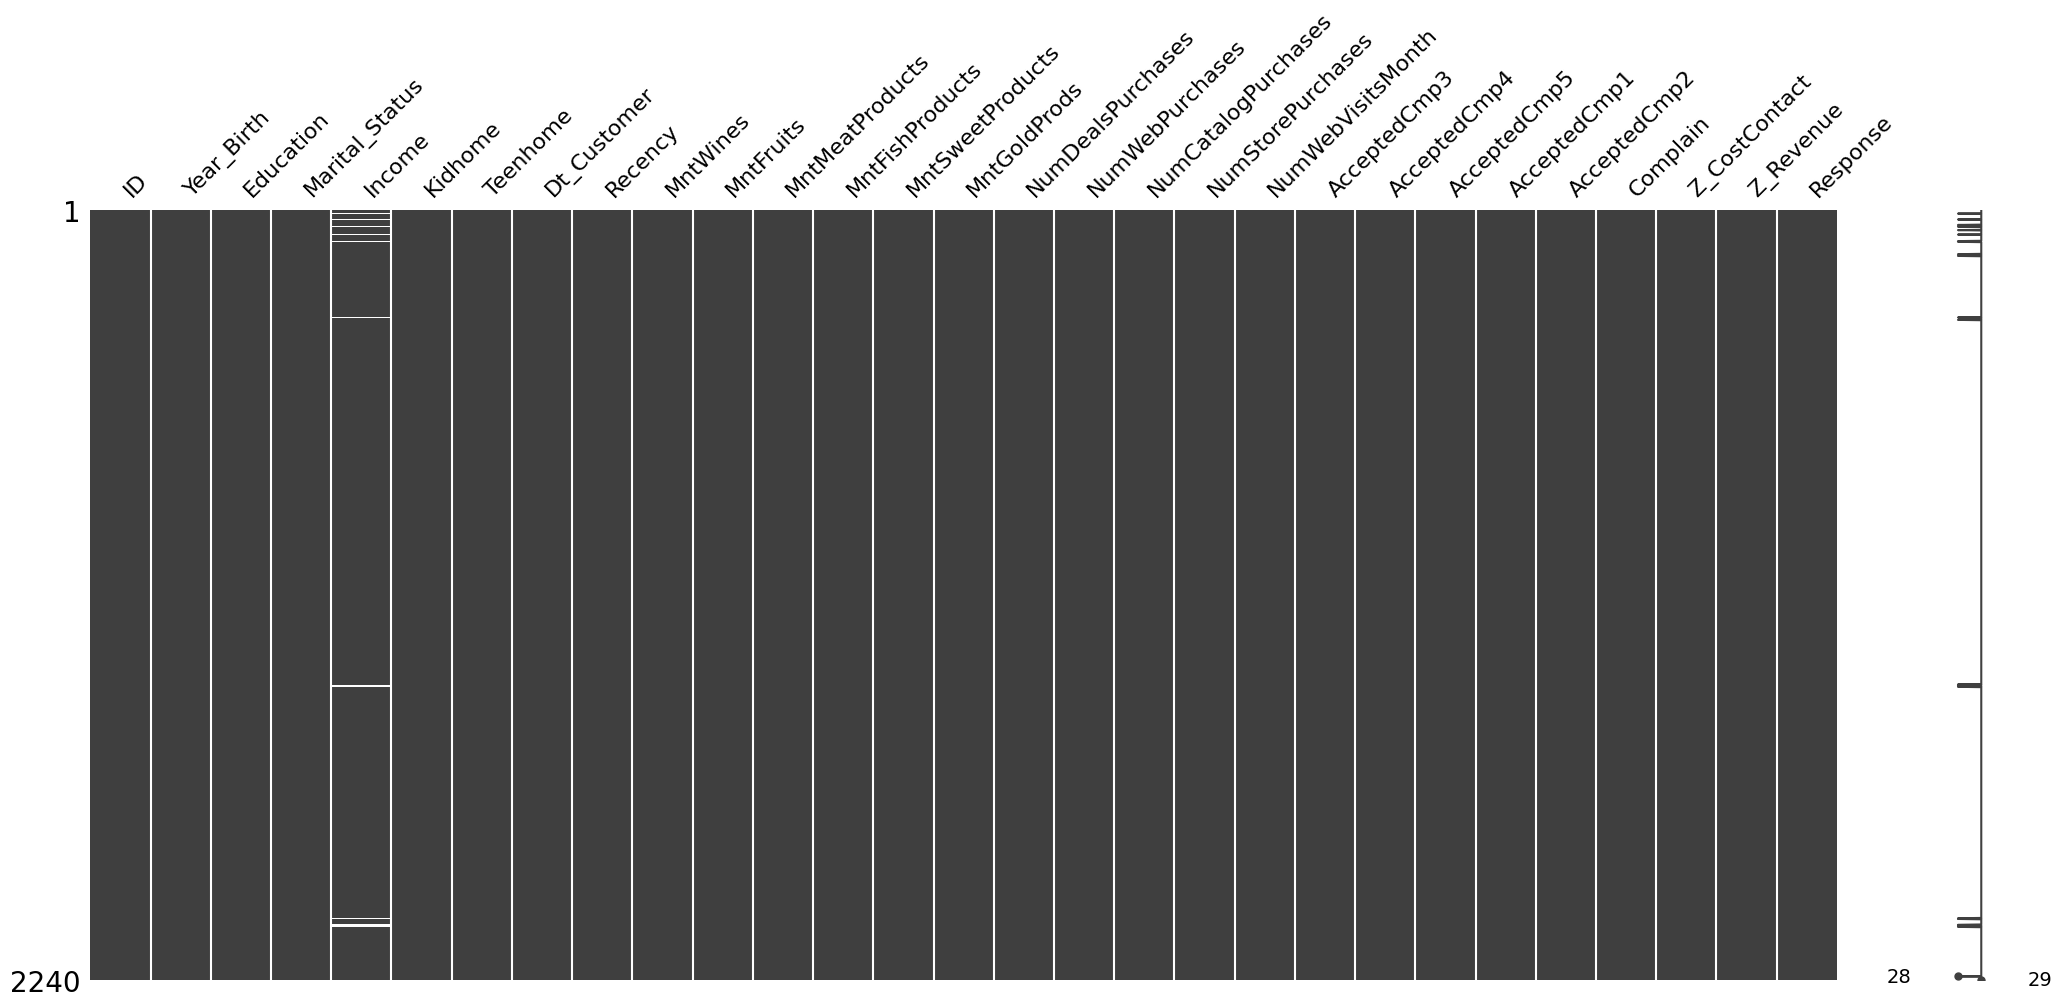

In [4]:
msno.matrix(df)

# Data Preprocessing

## Numerical values inside the dataset

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


----

## Duplicates in ID column

In [6]:
df['ID'].duplicated().sum()

0

# Objectives:

## Dataset

### 1. Year_Birth
- Check the min and max and remove outliers if any.

### 2. Marital_Status
- Check how many unique modifiers and sort accordingly

### 3. Income
- Replace the NaN values and remove outliers if any.

### 4. Dt_Customer
- Change data type to datetime

### 5. Z_CostContact
- Drop column, doesn't pertain any useful information and all the elements have the same value.

### 6. Z_Revenue
- Drop column, doesn't pertain any useful information and all the elements have the same value.

## New Columns

### 7. Group classes by age
- Young : Below 25 years old
- Adult: Between 25 to 60 years old
- Old : Above 60 years old

### 8. Total Children
- Combine the Kidhome and Teenhome column to create Childrenhome

### 9. Total Purchases
- Combine the MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts and MntGoldProds to create MntTotalPurchases

### 10. Group classes by income
- Lower class: Below 1 SD
- Middle class: Between IQR
- Upper class: Above 1 SD

### 11. Total number of purchases
- Combine the frequency of purchase from the customer

### 12. Join age
- Age of customer when they became a member

### 13. Organize the columns
- Reorganize the columns

# Data Cleaning

## Create a copy of the dataset

In [7]:
dfClean = df.copy()
dfClean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## 1. Year_Birth column

### Evaluation

#### Graph

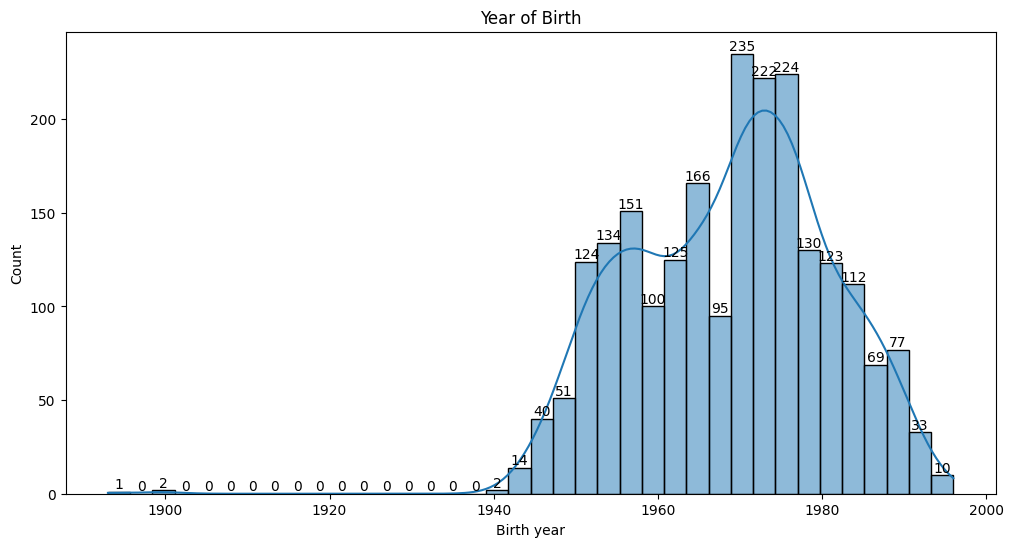

In [8]:
plt.figure(figsize=(12,6))

ax = sns.histplot(data= dfClean, x='Year_Birth', kde= True);
plt.title("Year of Birth")
plt.xlabel("Birth year")

for i in ax.containers:
    ax.bar_label(i)

In [9]:
dfClean['Year_Birth'].sort_values(ascending= False).tail()

424     1941
1950    1940
192     1900
339     1899
239     1893
Name: Year_Birth, dtype: int64

#### Analysis

1. From the graphs, we can see that there are several outliers when the data are displayed.
2. Because of these outliers, the graph is negatively skewed.
3. There are 3 outliers that have higher value than the fourth oldest in year of birth column.
4. The values of said outliers are around 40 years older than the fourth oldest.

### Cleaning

#### Remove outliers

In [10]:
ybOutliers = dfClean[dfClean['Year_Birth'] < 1940].index
ybOutliers

Index([192, 239, 339], dtype='int64')

In [11]:
dfClean = dfClean.drop(ybOutliers)
dfClean['Year_Birth'].info()

<class 'pandas.core.series.Series'>
Index: 2237 entries, 0 to 2239
Series name: Year_Birth
Non-Null Count  Dtype
--------------  -----
2237 non-null   int64
dtypes: int64(1)
memory usage: 35.0 KB


### Outcome

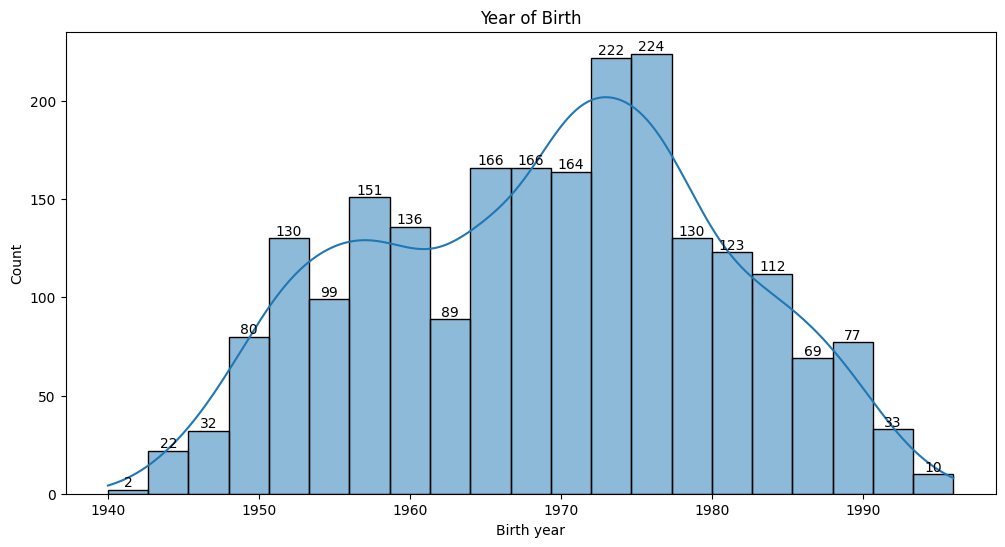

In [12]:
plt.figure(figsize=(12,6))

ax = sns.histplot(data= dfClean, x='Year_Birth', kde= True);
plt.title("Year of Birth")
plt.xlabel("Birth year")

for i in ax.containers:
    ax.bar_label(i)

#### Analysis

1. By removing the outliers the data now has a near standard distribution.
2. The year of birth range is now between around the year 1940 and 2000.

## 2. Marital_Status

### Evaluation

#### Graph

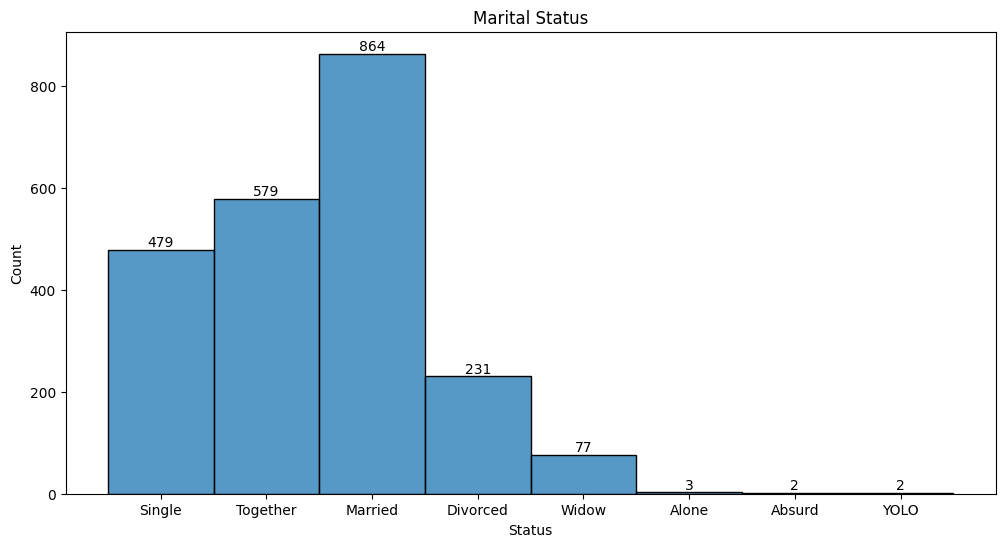

In [13]:
plt.figure(figsize=(12,6))

ax = sns.histplot(data= dfClean, x= 'Marital_Status');
plt.title("Marital Status")
plt.xlabel("Status")

for i in ax.containers:
    ax.bar_label(i)

#### Check unique modifiers

In [14]:
dfClean['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
dfClean['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

#### Analysis

1. From the graph, we can see that there are 8 categories in the Marital Status Column.
2. Alone, Absurd and YOLO could be considered a sub-category of Single.

### Cleaning

#### Replace outliers

In [16]:
msOutliers = dfClean[(dfClean['Marital_Status'] == 'Alone') | (dfClean['Marital_Status'] == 'Absurd') | (dfClean['Marital_Status'] == 'YOLO')].index
msOutliers

Index([131, 138, 153, 2093, 2134, 2177, 2202], dtype='int64')

In [17]:
dfClean.loc[msOutliers, 'Marital_Status'] = 'Single'
dfClean['Marital_Status'].loc[msOutliers]

131     Single
138     Single
153     Single
2093    Single
2134    Single
2177    Single
2202    Single
Name: Marital_Status, dtype: object

### Outcome

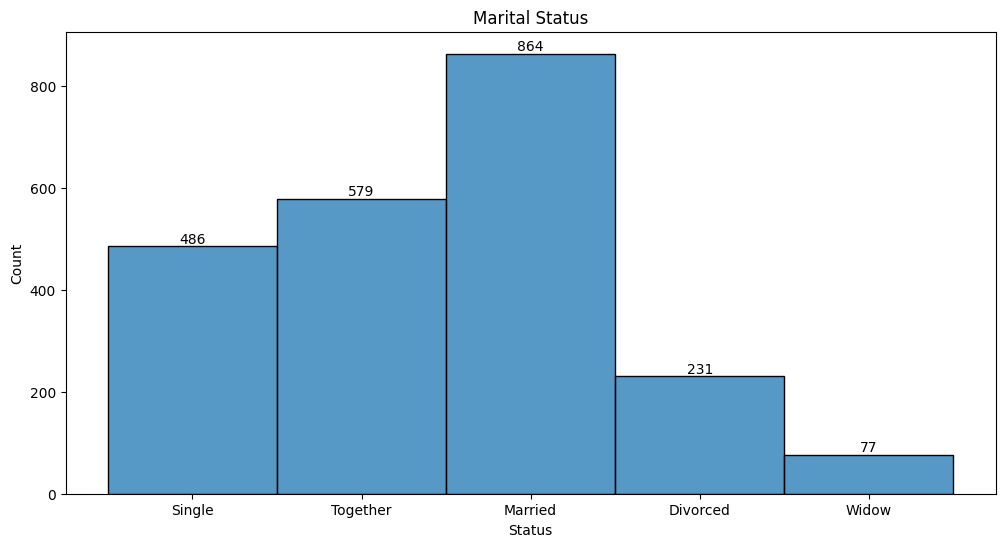

In [18]:
plt.figure(figsize=(12,6))

ax = sns.histplot(data= dfClean, x= 'Marital_Status');
plt.title("Marital Status")
plt.xlabel("Status")

for i in ax.containers:
    ax.bar_label(i)

In [19]:
dfClean['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      486
Divorced    231
Widow        77
Name: count, dtype: int64

#### Analysis

1. By integrating the sub-groups, the data is easier to read.
2. Reduced the columns from 7 to only 5.

## 3. Income

### Evaluation

#### Graph

Text(0.5, 0, 'Income in ($)')

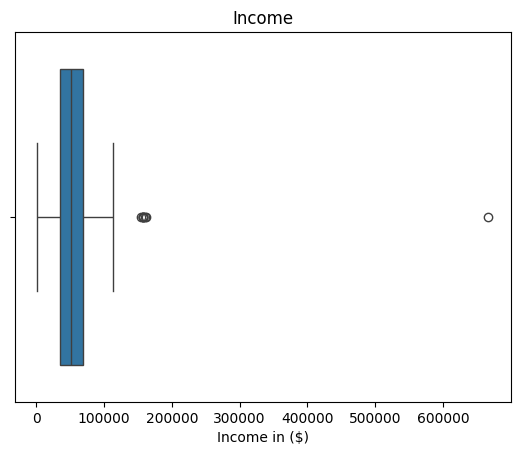

In [20]:
sns.boxplot(data= dfClean, x= 'Income');
plt.title("Income")
plt.xlabel("Income in ($)")

#### NaN values location

In [21]:
nanIndex = dfClean[dfClean['Income'].isna()].index
nanIndex

Index([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,  312,
        319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081, 2084, 2228],
      dtype='int64')

In [22]:
print('mean of Income:', dfClean['Income'].mean())
print('median of Income:', dfClean['Income'].median())

mean of Income: 52236.58156348848
median of Income: 51373.0


#### Analysis

1. There is not much difference between the median and mean price
2. The graph is positively skewed, therefore it is better to use the median value as the replacement

### Cleaning

#### Replacing the NaN value with the median

In [23]:
dfClean['Income'] = dfClean['Income'].fillna(dfClean['Income'].median())
dfClean['Income'].loc[nanIndex]

10      51373.0
27      51373.0
43      51373.0
48      51373.0
58      51373.0
71      51373.0
90      51373.0
91      51373.0
92      51373.0
128     51373.0
133     51373.0
312     51373.0
319     51373.0
1379    51373.0
1382    51373.0
1383    51373.0
1386    51373.0
2059    51373.0
2061    51373.0
2078    51373.0
2079    51373.0
2081    51373.0
2084    51373.0
2228    51373.0
Name: Income, dtype: float64

##### Checking if the value has changed

In [24]:
dfClean['Income'].isna().sum()

0

##### Change the values into int

In [25]:
dfClean['Income'] = dfClean['Income'].astype('int64')
dfClean['Income'].info()

<class 'pandas.core.series.Series'>
Index: 2237 entries, 0 to 2239
Series name: Income
Non-Null Count  Dtype
--------------  -----
2237 non-null   int64
dtypes: int64(1)
memory usage: 99.5 KB


#### Removing the outliers

##### Dropping the highest Income value

In [26]:
dfClean.sort_values(by='Income', ascending= False).head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924,0,0,07-02-2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
1898,4619,1945,PhD,Single,113734,0,0,28-05-2014,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,3,11,0
646,4611,1970,Graduation,Together,105471,0,0,21-01-2013,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,0,3,11,1


In [27]:
IncomeOutlier = dfClean[dfClean['Income'] == dfClean['Income'].max()].index
dfClean = dfClean.drop(IncomeOutlier)

##### Checking if the values has changed

In [28]:
dfClean.sort_values(by='Income', ascending= False).head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
617,1503,1976,PhD,Together,162397,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924,0,0,07-02-2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
1898,4619,1945,PhD,Single,113734,0,0,28-05-2014,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,3,11,0
646,4611,1970,Graduation,Together,105471,0,0,21-01-2013,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,0,3,11,1
252,10089,1974,Graduation,Divorced,102692,0,0,05-04-2013,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1


##### Graph

Text(0.5, 0, 'Income in ($)')

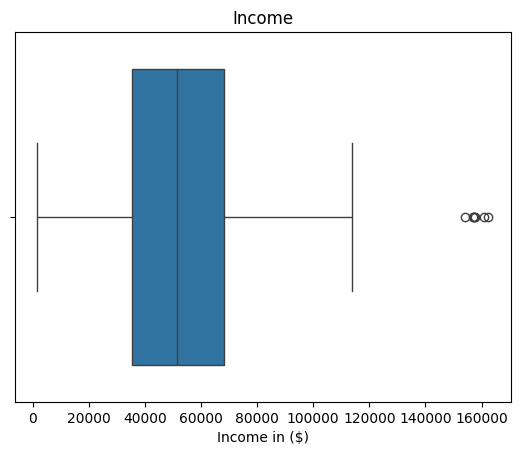

In [29]:
sns.boxplot(data= dfClean, x='Income');
plt.title("Income")
plt.xlabel("Income in ($)")

#### Removing outlier above Q3 range

In [30]:
IncomeOutliers = dfClean[dfClean['Income'] >= (dfClean['Income'].mean() + dfClean['Income'].describe()['75%'])].index
dfClean = dfClean.drop(IncomeOutliers)

##### Checking if the value has changed

In [31]:
dfClean.sort_values(by='Income', ascending= False).head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1898,4619,1945,PhD,Single,113734,0,0,28-05-2014,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,3,11,0
646,4611,1970,Graduation,Together,105471,0,0,21-01-2013,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,0,3,11,1
252,10089,1974,Graduation,Divorced,102692,0,0,05-04-2013,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1
203,2798,1977,PhD,Together,102160,0,0,02-11-2012,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,0,3,11,1
124,7215,1983,Graduation,Single,101970,0,0,12-03-2013,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,0,3,11,1
1113,7451,1960,Master,Single,98777,0,0,17-02-2014,23,1000,19,711,125,115,38,0,4,6,9,1,0,1,0,0,0,0,3,11,0
650,4248,1960,Master,Single,98777,0,0,17-02-2014,23,1000,19,711,125,115,38,0,4,6,9,1,0,1,0,0,0,0,3,11,0
2012,500,1977,Graduation,Together,96876,0,0,06-08-2013,79,908,43,735,40,194,21,1,7,7,9,2,0,1,1,1,0,0,3,11,1
1958,2109,1990,Graduation,Single,96843,0,0,23-04-2013,60,448,71,951,40,17,17,1,6,11,10,2,0,0,1,0,0,0,3,11,1
1995,6815,1980,2n Cycle,Married,96547,0,0,23-05-2014,4,448,21,125,52,101,62,0,7,6,8,2,1,0,1,1,0,0,3,11,1


##### Graph

Text(0.5, 0, 'Income in ($)')

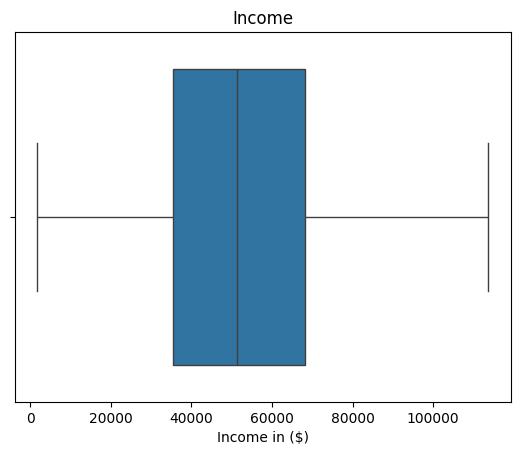

In [32]:
sns.boxplot(data= dfClean, x='Income');
plt.title("Income")
plt.xlabel("Income in ($)")

### Outcome

#### Graph

Text(0.5, 0, 'Income in ($)')

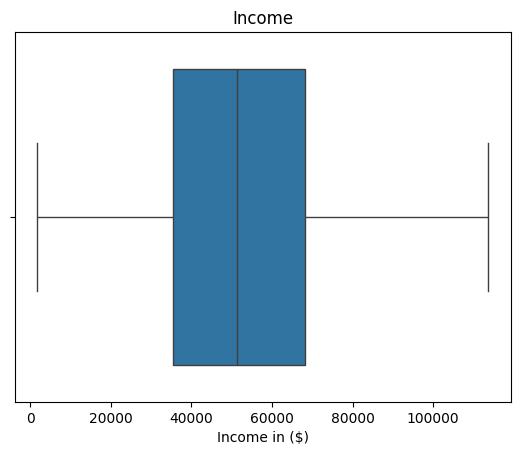

In [33]:
sns.boxplot(data= dfClean, x='Income');
plt.title("Income")
plt.xlabel("Income in ($)")

In [34]:
print('mean of Income:', dfClean['Income'].mean())
print('median of Income:', dfClean['Income'].median())

mean of Income: 51619.412741139524
median of Income: 51373.0


#### Analysis

1. The mean of df['Income'] has only changed by $600 after removing the outliers
2. The data is now has a bell-curved distribution, rather than positively skewed.

## 4. Dt_Customer

### Evaluation

#### Check the type

In [35]:
dfClean['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Index: 2229 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype 
--------------  ----- 
2229 non-null   object
dtypes: object(1)
memory usage: 34.8+ KB


#### Checking the min and max values

In [36]:
print('Min join date :', dfClean['Dt_Customer'].min())
print('Max join date :', dfClean['Dt_Customer'].max())

Min join date : 01-01-2013
Max join date : 31-12-2013


#### Analysis

1. If the data consists of date variables, it is better to have the Dtype as Datetime rather than object.

### Cleaning

#### Change the type to datetime

In [37]:
dfClean['Dt_Customer'] = pd.to_datetime(dfClean['Dt_Customer'], format='%d-%m-%Y')
dfClean['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Index: 2229 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2229 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.8 KB


### Outcome

#### Range of the date

In [38]:
print('Min join date :', dfClean['Dt_Customer'].min())
print('Max join date :', dfClean['Dt_Customer'].max())

Min join date : 2012-07-30 00:00:00
Max join date : 2014-06-29 00:00:00


#### Analysis

1. By changing the Dtype to Datetime, the correct minimun and maximum value is shown.
2. As seen in the min and max join date, the month of July has only occured once, while other months occured twice.
    - This could be seen as a factor that will impact the data.

## 5. Z_CostContact

### Evaluation

#### Check the unique value

In [39]:
dfClean['Z_CostContact'].unique()

array([3], dtype=int64)

### Cleaning

#### Remove the column

In [40]:
dfClean = dfClean.drop('Z_CostContact', axis=1)
dfClean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,11,0


### Outcome

#### Analysis

- Removed the column, because the value is the same for each rows

## 6. Z_Revenue

### Evaluation

#### Check the unique value

In [41]:
dfClean['Z_Revenue'].unique()

array([11], dtype=int64)

### Cleaning

#### Remove the column

In [42]:
dfClean = dfClean.drop('Z_Revenue', axis=1)
dfClean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Outcome

#### Analysis

- Removed the column, because the value is the same for each rows

# New Columns

In [43]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Year_Birth           2229 non-null   int64         
 2   Education            2229 non-null   object        
 3   Marital_Status       2229 non-null   object        
 4   Income               2229 non-null   int64         
 5   Kidhome              2229 non-null   int64         
 6   Teenhome             2229 non-null   int64         
 7   Dt_Customer          2229 non-null   datetime64[ns]
 8   Recency              2229 non-null   int64         
 9   MntWines             2229 non-null   int64         
 10  MntFruits            2229 non-null   int64         
 11  MntMeatProducts      2229 non-null   int64         
 12  MntFishProducts      2229 non-null   int64         
 13  MntSweetProducts     2229 non-null   i

## 7. Group classes by age

### Defining the parameters

In [44]:
def ageGroup(x):
    if (2014 - x) < 25:
        return 'Young'
    elif (2014 - x) > 60:
        return 'Old'
    else:
        return 'Adult'

### Inserting the values into a new column

In [45]:
dfClean.insert(2, 'Age_Group', dfClean['Year_Birth'].apply(ageGroup))
dfClean.head()

,ID,Year_Birth,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Adult,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Adult,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Adult,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Adult,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Adult,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Amount of each group

In [46]:
dfClean['Age_Group'].value_counts()

Age_Group
Adult    1903
Old       265
Young      61
Name: count, dtype: int64

### Analysis
- To easily categorize the age group of the members

## 8. Total children

### Adding the columns

In [47]:
dfClean.insert(8, 'Childrenhome', dfClean['Kidhome'] + dfClean['Teenhome'])
dfClean.head()

,ID,Year_Birth,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,Childrenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Adult,Graduation,Single,58138,0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Adult,Graduation,Single,46344,1,1,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Adult,Graduation,Together,71613,0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Adult,Graduation,Together,26646,1,0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Adult,PhD,Married,58293,1,0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Analysis
- To quantify the total amount of children living in the household

## 9. Total Purchases

### Adding the columns

In [48]:
dfClean.insert(17, 'MntTotalPurchase', dfClean['MntWines'] + dfClean['MntFruits'] + dfClean['MntMeatProducts'] + dfClean['MntFishProducts'] + dfClean['MntSweetProducts'] + dfClean['MntGoldProds'])
dfClean.head()

,ID,Year_Birth,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,Childrenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotalPurchase,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Adult,Graduation,Single,58138,0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Adult,Graduation,Single,46344,1,1,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Adult,Graduation,Together,71613,0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Adult,Graduation,Together,26646,1,0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Adult,PhD,Married,58293,1,0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0


### Analysis
- To give a sum of the total product bought

## 10. Group classes by income

### Description

In [49]:
dfClean['Income'].describe()

count      2229.000000
mean      51619.412741
std       20601.217324
min        1730.000000
25%       35416.000000
50%       51373.000000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64

### Defining the parameter

In [50]:
def incomeClass(x):
    if x < dfClean['Income'].describe()['25%']:
        return 'Lower'
    elif x > dfClean['Income'].describe()['75%']:
        return 'Upper'
    else:
        return 'Middle'

### Inserting the values into a new column

In [51]:
dfClean.insert(4, 'Income_Class', dfClean['Income'].apply(incomeClass))
dfClean.head()

,ID,Year_Birth,Age_Group,Education,Income_Class,Marital_Status,Income,Kidhome,Teenhome,Childrenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotalPurchase,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Adult,Graduation,Middle,Single,58138,0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Adult,Graduation,Middle,Single,46344,1,1,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Adult,Graduation,Upper,Together,71613,0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Adult,Graduation,Lower,Together,26646,1,0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Adult,PhD,Middle,Married,58293,1,0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0


### Amount of each group

In [52]:
dfClean['Income_Class'].value_counts()

Income_Class
Middle    1116
Lower      557
Upper      556
Name: count, dtype: int64

### Analysis
- By grouping the income into 3 categories, which are 'Lower', 'Middle' and 'Upper', it is easier to classify them when comparing with other categories.

## 11. Total number of purchases

### Adding purchases from several columns into a new column

In [53]:
dfClean.insert(23, 'NumOfPurchases', dfClean['NumWebPurchases'] + dfClean['NumCatalogPurchases'] + dfClean['NumStorePurchases'])
dfClean.head()

,ID,Year_Birth,Age_Group,Education,Income_Class,Marital_Status,Income,Kidhome,Teenhome,Childrenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotalPurchase,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumOfPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Adult,Graduation,Middle,Single,58138,0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,2174,1954,Adult,Graduation,Middle,Single,46344,1,1,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,4141,1965,Adult,Graduation,Upper,Together,71613,0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,6182,1984,Adult,Graduation,Lower,Together,26646,1,0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,5324,1981,Adult,PhD,Middle,Married,58293,1,0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0


### Analysis
- By grouping the total number of times the customer purchased from the store, it is easier to compare the way of visit to the total purchased amount.

## 12. Join age

### Get year value from Dt_Customer

In [54]:
joinYear = dfClean['Dt_Customer'].dt.strftime('%Y')

### Change the dtype to int

In [55]:
joinYear = joinYear.astype(int)
joinYear

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2229, dtype: int32

### Create a new column and calculate the age

In [56]:
dfClean.insert(11, 'Joined_Age', joinYear - dfClean['Year_Birth'])
dfClean.head()

,ID,Year_Birth,Age_Group,Education,Income_Class,Marital_Status,Income,Kidhome,Teenhome,Childrenhome,Dt_Customer,Joined_Age,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotalPurchase,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumOfPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Adult,Graduation,Middle,Single,58138,0,0,0,2012-09-04,55,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,2174,1954,Adult,Graduation,Middle,Single,46344,1,1,2,2014-03-08,60,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,4141,1965,Adult,Graduation,Upper,Together,71613,0,0,0,2013-08-21,48,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,6182,1984,Adult,Graduation,Lower,Together,26646,1,0,1,2014-02-10,30,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,5324,1981,Adult,PhD,Middle,Married,58293,1,0,1,2014-01-19,33,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0


### Analysis
- By grouping the age, it is easier to check the customer demographic

## 13. Create a total Accepted_Rate column

In [57]:
dfClean.insert(30, 'Accepted_Rate', dfClean['AcceptedCmp1'] + dfClean['AcceptedCmp2'] + dfClean['AcceptedCmp3'] + dfClean['AcceptedCmp4'] + dfClean['AcceptedCmp5'] + dfClean['Response'])
dfClean.head()

,ID,Year_Birth,Age_Group,Education,Income_Class,Marital_Status,Income,Kidhome,Teenhome,Childrenhome,Dt_Customer,Joined_Age,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotalPurchase,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumOfPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Accepted_Rate,AcceptedCmp2,Complain,Response
0,5524,1957,Adult,Graduation,Middle,Single,58138,0,0,0,2012-09-04,55,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,1,0,0,1
1,2174,1954,Adult,Graduation,Middle,Single,46344,1,1,2,2014-03-08,60,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0,0
2,4141,1965,Adult,Graduation,Upper,Together,71613,0,0,0,2013-08-21,48,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0,0
3,6182,1984,Adult,Graduation,Lower,Together,26646,1,0,1,2014-02-10,30,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,0
4,5324,1981,Adult,PhD,Middle,Married,58293,1,0,1,2014-01-19,33,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0,0


## 14. Organize the columns

### Reorganize the columns by creating a copy and renaming them

In [58]:
dfClean.insert(1, 'Customer_Join_Date', dfClean['Dt_Customer'])
dfClean.insert(3, 'Customer_Join_Age', dfClean['Joined_Age'])
dfClean.rename(columns={'AcceptedCmp1' : 'AcceptedCmp1.1'}, inplace= True)
dfClean.insert(28, 'AcceptedCmp1', dfClean['AcceptedCmp1.1'])
dfClean.rename(columns={'AcceptedCmp2' : 'AcceptedCmp2.1'}, inplace= True)
dfClean.insert(29, 'AcceptedCmp2', dfClean['AcceptedCmp2.1'])
dfClean.insert(34, 'AcceptedCmp6', dfClean['Response'])
dfClean.rename(columns={'NumDealsPurchases' : 'NumDealsPurchases1'}, inplace= True)
dfClean.insert(36, 'NumDealsPurchases', dfClean['NumDealsPurchases1'])

### Dropping the columns

In [59]:
dfClean.drop(columns=['Dt_Customer', 'Joined_Age', 'AcceptedCmp1.1', 'AcceptedCmp2.1', 'Response', 'NumDealsPurchases1'], inplace= True)

### Checking the dataset

In [60]:
dfClean.head()

,ID,Customer_Join_Date,Year_Birth,Customer_Join_Age,Age_Group,Education,Income_Class,Marital_Status,Income,Kidhome,Teenhome,Childrenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotalPurchase,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumOfPurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Accepted_Rate,NumDealsPurchases,Complain
0,5524,2012-09-04,1957,55,Adult,Graduation,Middle,Single,58138,0,0,0,58,635,88,546,172,88,88,1617,8,10,4,22,7,0,0,0,0,0,1,1,3,0
1,2174,2014-03-08,1954,60,Adult,Graduation,Middle,Single,46344,1,1,2,38,11,1,6,2,1,6,27,1,1,2,4,5,0,0,0,0,0,0,0,2,0
2,4141,2013-08-21,1965,48,Adult,Graduation,Upper,Together,71613,0,0,0,26,426,49,127,111,21,42,776,8,2,10,20,4,0,0,0,0,0,0,0,1,0
3,6182,2014-02-10,1984,30,Adult,Graduation,Lower,Together,26646,1,0,1,26,11,4,20,10,3,5,53,2,0,4,6,6,0,0,0,0,0,0,0,2,0
4,5324,2014-01-19,1981,33,Adult,PhD,Middle,Married,58293,1,0,1,94,173,43,118,46,27,15,422,5,3,6,14,5,0,0,0,0,0,0,0,5,0


In [61]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Customer_Join_Date   2229 non-null   datetime64[ns]
 2   Year_Birth           2229 non-null   int64         
 3   Customer_Join_Age    2229 non-null   int64         
 4   Age_Group            2229 non-null   object        
 5   Education            2229 non-null   object        
 6   Income_Class         2229 non-null   object        
 7   Marital_Status       2229 non-null   object        
 8   Income               2229 non-null   int64         
 9   Kidhome              2229 non-null   int64         
 10  Teenhome             2229 non-null   int64         
 11  Childrenhome         2229 non-null   int64         
 12  Recency              2229 non-null   int64         
 13  MntWines             2229 non-null   i

# Data Analysis

## Data Info

###  Dataset

In [62]:
dfClean.head()

,ID,Customer_Join_Date,Year_Birth,Customer_Join_Age,Age_Group,Education,Income_Class,Marital_Status,Income,Kidhome,Teenhome,Childrenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotalPurchase,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumOfPurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Accepted_Rate,NumDealsPurchases,Complain
0,5524,2012-09-04,1957,55,Adult,Graduation,Middle,Single,58138,0,0,0,58,635,88,546,172,88,88,1617,8,10,4,22,7,0,0,0,0,0,1,1,3,0
1,2174,2014-03-08,1954,60,Adult,Graduation,Middle,Single,46344,1,1,2,38,11,1,6,2,1,6,27,1,1,2,4,5,0,0,0,0,0,0,0,2,0
2,4141,2013-08-21,1965,48,Adult,Graduation,Upper,Together,71613,0,0,0,26,426,49,127,111,21,42,776,8,2,10,20,4,0,0,0,0,0,0,0,1,0
3,6182,2014-02-10,1984,30,Adult,Graduation,Lower,Together,26646,1,0,1,26,11,4,20,10,3,5,53,2,0,4,6,6,0,0,0,0,0,0,0,2,0
4,5324,2014-01-19,1981,33,Adult,PhD,Middle,Married,58293,1,0,1,94,173,43,118,46,27,15,422,5,3,6,14,5,0,0,0,0,0,0,0,5,0


In [63]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Customer_Join_Date   2229 non-null   datetime64[ns]
 2   Year_Birth           2229 non-null   int64         
 3   Customer_Join_Age    2229 non-null   int64         
 4   Age_Group            2229 non-null   object        
 5   Education            2229 non-null   object        
 6   Income_Class         2229 non-null   object        
 7   Marital_Status       2229 non-null   object        
 8   Income               2229 non-null   int64         
 9   Kidhome              2229 non-null   int64         
 10  Teenhome             2229 non-null   int64         
 11  Childrenhome         2229 non-null   int64         
 12  Recency              2229 non-null   int64         
 13  MntWines             2229 non-null   i

### Heatmap Correlation

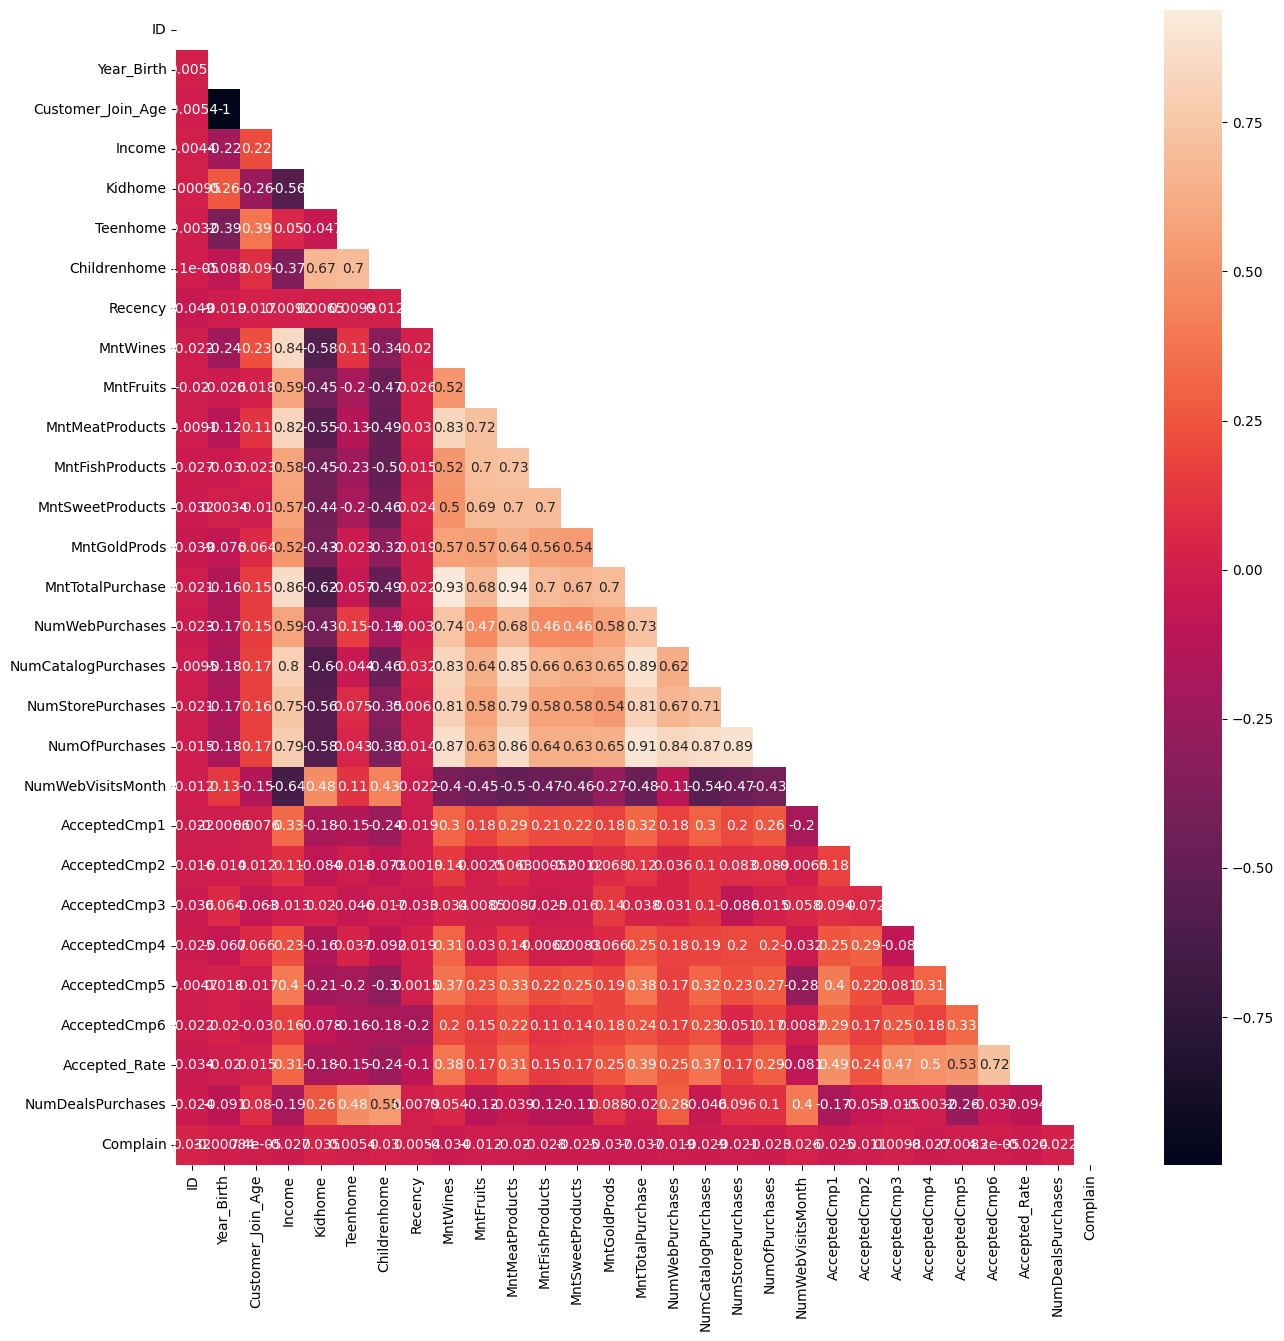

In [64]:
plt.figure(figsize=(15,15))
dfHM = dfClean.corr(method='spearman', numeric_only= True)
dfMatrix = np.triu(dfClean.corr(numeric_only= True))
sns.heatmap(data=dfHM, annot= True, mask= dfMatrix);

## Relationships

### Customer_Join_Age, Marital_Status, Childrenhome, Income_Class, Education, MntTotalPurchase, NumOfPurchases, Accepted_Rate and Complain

In [65]:
dfComp = dfClean[['Customer_Join_Age', 'Marital_Status', 'Childrenhome', 'Income_Class', 'Education', 'MntTotalPurchase', 'NumOfPurchases', 'Accepted_Rate', 'Complain']]
dfComp

,Customer_Join_Age,Marital_Status,Childrenhome,Income_Class,Education,MntTotalPurchase,NumOfPurchases,Accepted_Rate,Complain
0,55,Single,0,Middle,Graduation,1617,22,1,0
1,60,Single,2,Middle,Graduation,27,4,0,0
2,48,Together,0,Upper,Graduation,776,20,0,0
3,30,Together,1,Lower,Graduation,53,6,0,0
4,33,Married,1,Middle,PhD,422,14,0,0
...,...,...,...,...,...,...,...,...,...
2235,46,Married,1,Middle,Graduation,1341,16,0,0
2236,68,Together,3,Middle,PhD,444,15,1,0
2237,33,Divorced,0,Middle,Graduation,1241,18,1,0
2238,58,Together,1,Upper,Master,843,21,0,0


#### Changing the value from string to int in some columns

In [66]:
# Single = 0, Together = 2, Married = 3, Divorced = 4, Widow = 5 
print(dfComp['Marital_Status'].unique())
# Lower = 0, Middle = 1, Upper = 2
print(dfComp['Income_Class'].unique())
# Basic = 0, Graduation = 1, 2n Cycle = 2, Master = 3, PhD = 4
print(dfComp['Education'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow']
['Middle' 'Upper' 'Lower']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


#### Marital_Status

In [67]:
def MarStatus(status):
    if status == 'Single':
        return 0
    elif status == 'Together':
        return 1
    elif status == 'Married':
        return 2
    elif status == 'Divorced':
        return 3
    else:
        return 4
    
dfComp.insert(1, 'Status', dfComp['Marital_Status'].apply(MarStatus))
dfComp = dfComp.drop(columns='Marital_Status')
dfComp

,Customer_Join_Age,Status,Childrenhome,Income_Class,Education,MntTotalPurchase,NumOfPurchases,Accepted_Rate,Complain
0,55,0,0,Middle,Graduation,1617,22,1,0
1,60,0,2,Middle,Graduation,27,4,0,0
2,48,1,0,Upper,Graduation,776,20,0,0
3,30,1,1,Lower,Graduation,53,6,0,0
4,33,2,1,Middle,PhD,422,14,0,0
...,...,...,...,...,...,...,...,...,...
2235,46,2,1,Middle,Graduation,1341,16,0,0
2236,68,1,3,Middle,PhD,444,15,1,0
2237,33,3,0,Middle,Graduation,1241,18,1,0
2238,58,1,1,Upper,Master,843,21,0,0


#### Education

In [68]:
def Edu(edu):
    if edu == 'Basic':
        return 0
    elif edu == 'Graduation':
        return 1
    elif edu == '2n Cycle':
        return 2
    elif edu == 'Master':
        return 3
    else:
        return 4   

dfComp.insert(4, 'Edu_Degree', dfComp['Education'].apply(Edu))
dfComp = dfComp.drop(columns='Education')
dfComp

,Customer_Join_Age,Status,Childrenhome,Income_Class,Edu_Degree,MntTotalPurchase,NumOfPurchases,Accepted_Rate,Complain
0,55,0,0,Middle,1,1617,22,1,0
1,60,0,2,Middle,1,27,4,0,0
2,48,1,0,Upper,1,776,20,0,0
3,30,1,1,Lower,1,53,6,0,0
4,33,2,1,Middle,4,422,14,0,0
...,...,...,...,...,...,...,...,...,...
2235,46,2,1,Middle,1,1341,16,0,0
2236,68,1,3,Middle,4,444,15,1,0
2237,33,3,0,Middle,1,1241,18,1,0
2238,58,1,1,Upper,3,843,21,0,0


#### Income_Class

In [69]:
def ClassInc(inc):
    if inc == 'Lower':
        return 0
    elif inc == 'Middle':
        return 1
    else:
        return 2  

dfComp.insert(3, 'Inc_Class', dfComp['Income_Class'].apply(ClassInc))
dfComp = dfComp.drop(columns='Income_Class')
dfComp

,Customer_Join_Age,Status,Childrenhome,Inc_Class,Edu_Degree,MntTotalPurchase,NumOfPurchases,Accepted_Rate,Complain
0,55,0,0,1,1,1617,22,1,0
1,60,0,2,1,1,27,4,0,0
2,48,1,0,2,1,776,20,0,0
3,30,1,1,0,1,53,6,0,0
4,33,2,1,1,4,422,14,0,0
...,...,...,...,...,...,...,...,...,...
2235,46,2,1,1,1,1341,16,0,0
2236,68,1,3,1,4,444,15,1,0
2237,33,3,0,1,1,1241,18,1,0
2238,58,1,1,2,3,843,21,0,0


#### Heat Map

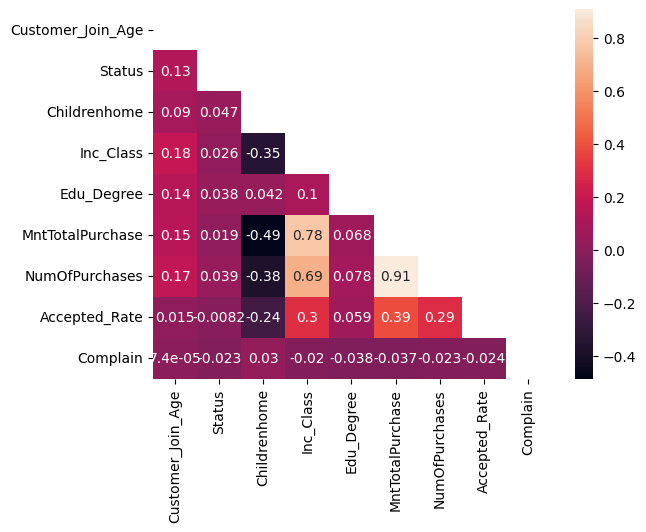

In [70]:
dfCompHM = dfComp.corr(method='spearman', numeric_only= True)
dfMatrixComp = np.triu(dfCompHM.corr(numeric_only= True))
sns.heatmap(data=dfCompHM, annot= True, mask= dfMatrixComp);

#### Analysis
1. It is shown that the total number of purchased items (MntTotalPurchase) is strongly correlated to the amount of visits (NumOfPurchases), which is at 0.89
2. Income Class also has a strong relation with the number of purchased items and amount of visits, which is at 0.78 and 0.63 respectively
3. The amount of children is also a factor to the total number of purchased items, which is at -0.49

### Customer demographics

#### Customer Age and Income Class

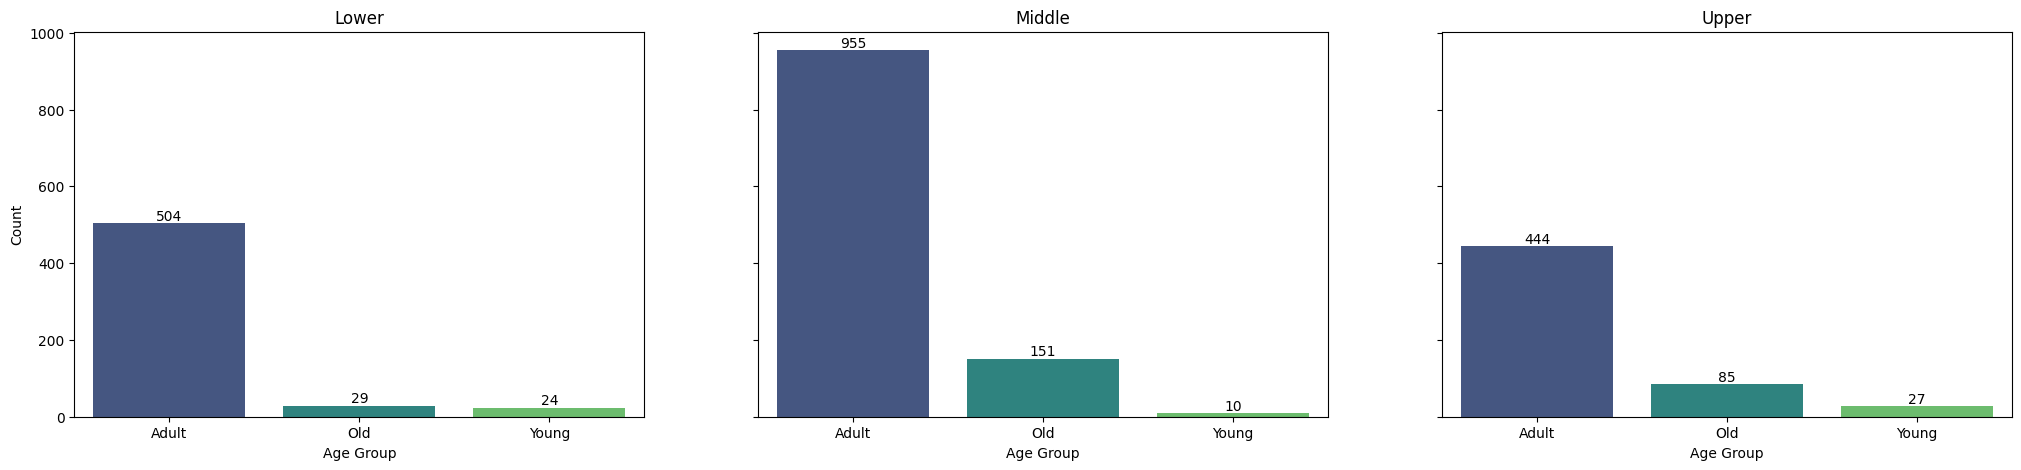

In [96]:
test1 = dfClean.pivot_table(columns='Income_Class', index='Age_Group', values='Income', aggfunc='count')

fig, ax = plt.subplots(1, 3, figsize=(25, 5), sharey=True)

for i, classes in enumerate(test1.columns):
    sns.barplot(x=test1.index,
                y=test1[classes],
                ax=ax[i],
                palette='viridis'
                )
    ax[i].set_title(classes)
    ax[i].set_xlabel('Age Group')
    ax[i].set_ylabel('Count')
    
    for p in ax[i].patches:
        ax[i].annotate('{:.0f}'.format(p.get_height()),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center',
                       va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

    


plt.show()

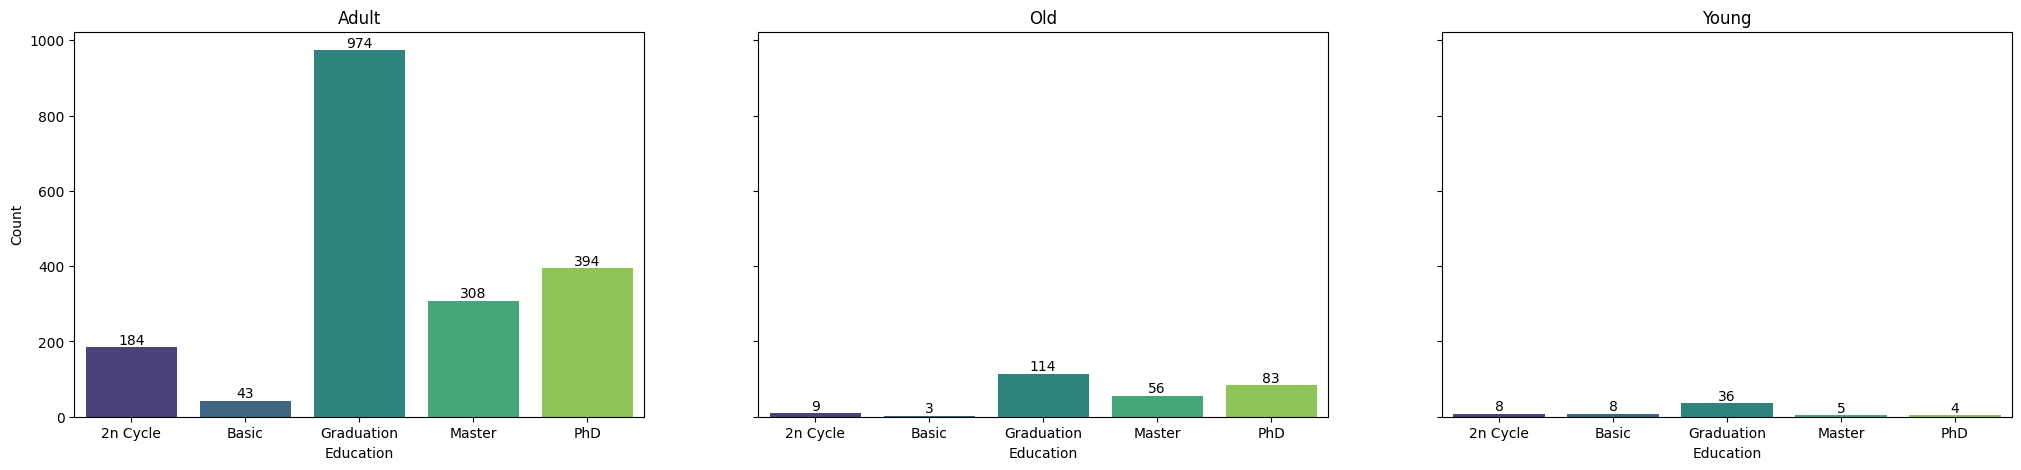

In [99]:
test2 = dfClean.pivot_table(columns='Age_Group', index='Education', values='Income', aggfunc='count')

fig, ax = plt.subplots(1, 3, figsize=(25, 5), sharey=True)

for i, status in enumerate(test2.columns):
    sns.barplot(x=test2.index,
                y=test2[status],
                ax=ax[i],
                palette='viridis'
                )
    
    ax[i].set_title(status)
    ax[i].set_xlabel('Education')
    ax[i].set_ylabel('Count')
    
    for p in ax[i].patches:
        ax[i].annotate('{:.0f}'.format(p.get_height()),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center',
                       va='center',
                       xytext=(0, 5),
                       textcoords='offset points')
        

plt.show()

##### Analysis
1. From the adult demographic, majority of the customer has graduated and earned a degree (Graduation)

#### Marital Status and Education

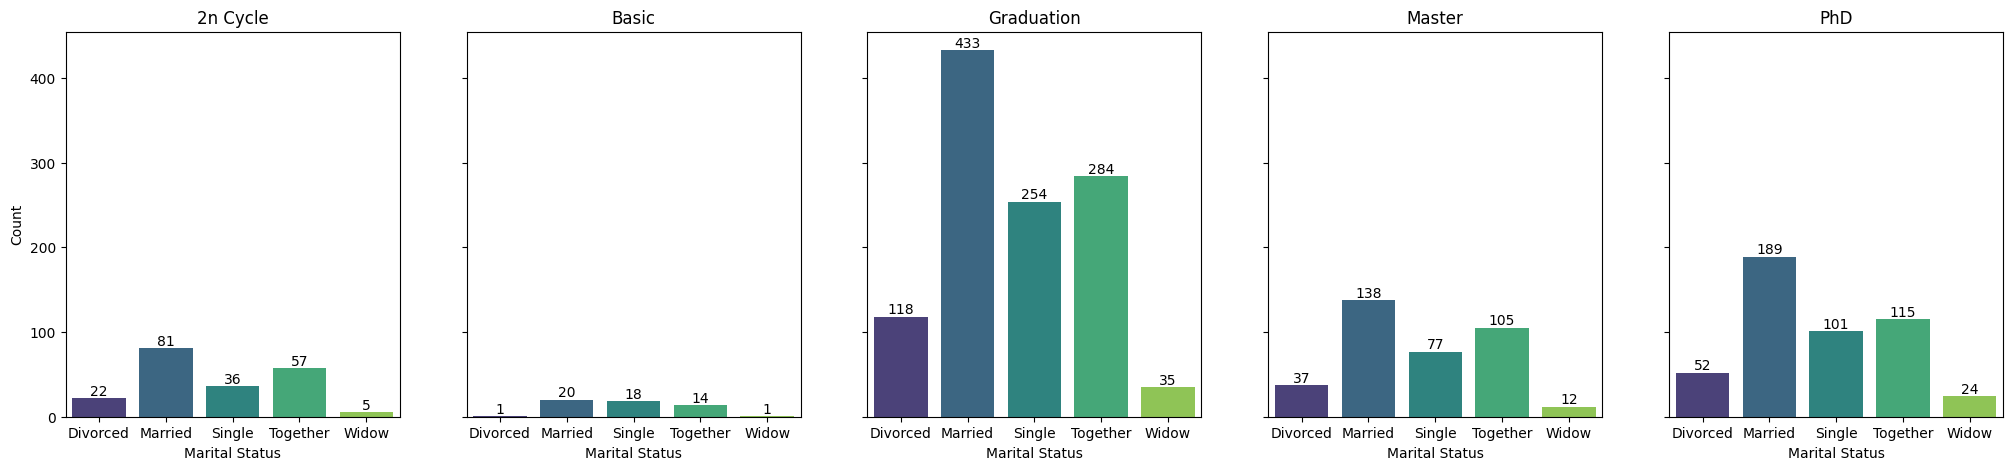

In [98]:
test3 = dfClean.pivot_table(columns='Education', index='Marital_Status', values='Income', aggfunc='count')

fig, ax = plt.subplots(1, 5, figsize=(25, 5), sharey=True)

for i, status in enumerate(test3.columns):
    sns.barplot(x=test3.index,
                y=test3[status],
                ax=ax[i],
                palette='viridis'
                )
    
    ax[i].set_title(status)
    ax[i].set_xlabel('Marital Status')
    ax[i].set_ylabel('Count')
    
    for p in ax[i].patches:
        ax[i].annotate('{:.0f}'.format(p.get_height()),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center',
                       va='center',
                       xytext=(0, 5),
                       textcoords='offset points')
        

plt.show()

##### Analysis
1. The graduated demographic has the majority of married customers and few widowed customers
2. It could be surmised, that the biggest demographic is customers which has middle income, is in the productive age (24-65), has a degree and is married.

### Age relation to the number of visit and total purchase

In [74]:
dfClean['Age_Group'].value_counts()

Age_Group
Adult    1903
Old       265
Young      61
Name: count, dtype: int64

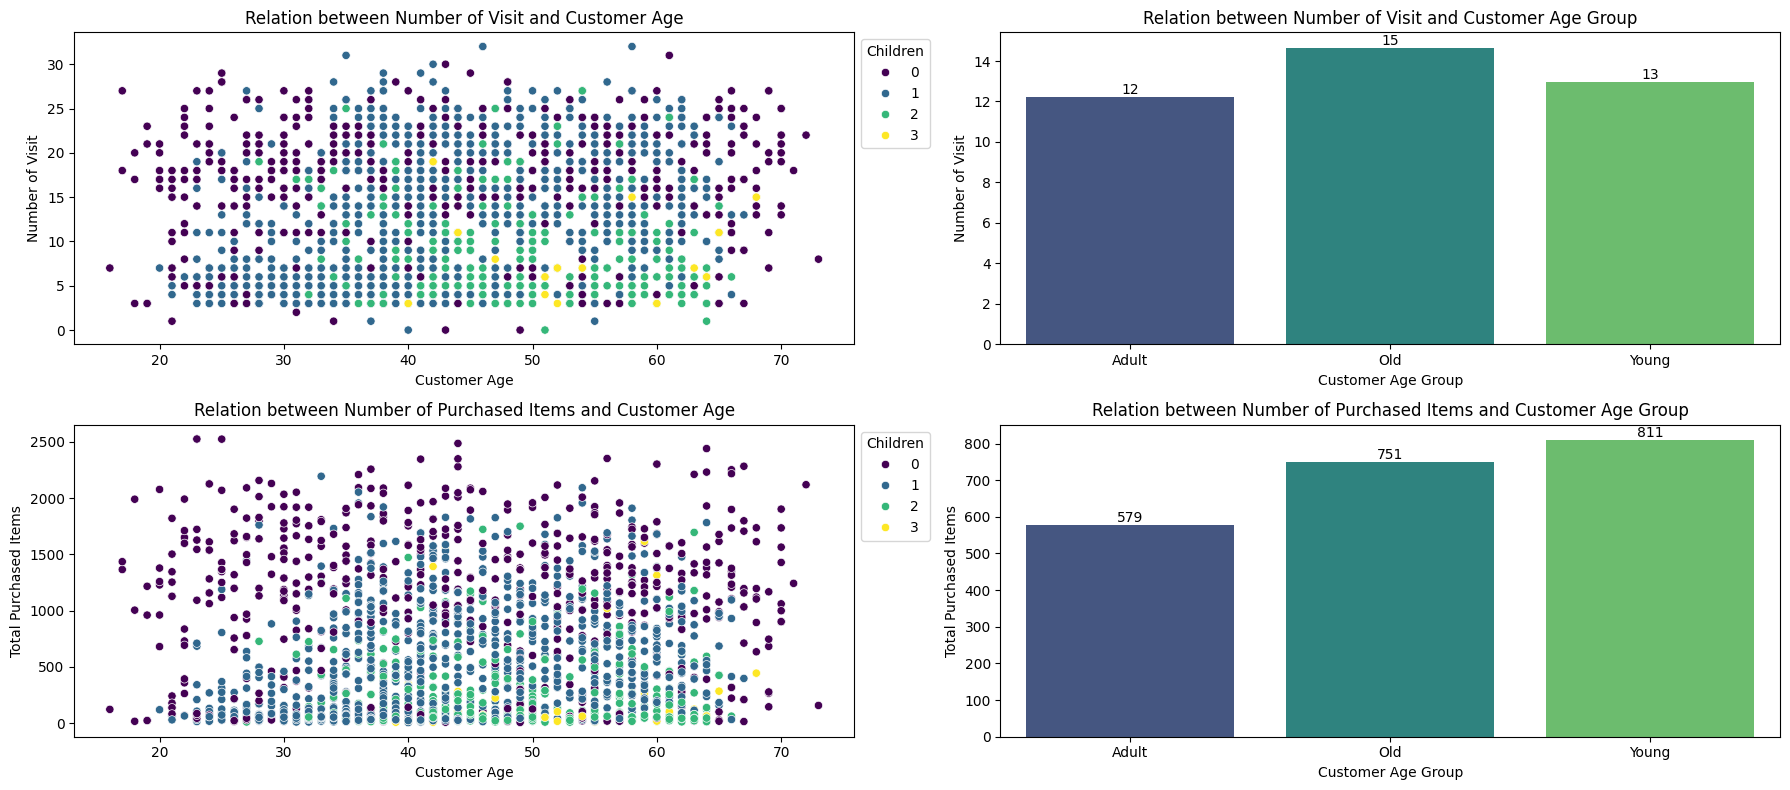

In [75]:
plt.figure(figsize=(18, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=dfClean, x= 'Customer_Join_Age',
            y='NumOfPurchases',
            hue= 'Childrenhome',
            palette='viridis')

plt.title("Relation between Number of Visit and Customer Age")
plt.ylabel('Number of Visit')
plt.xlabel('Customer Age')
plt.legend(bbox_to_anchor=(1, 1),  title = 'Children')

plt.subplot(2, 2, 2)
sns.barplot(data=dfClean, x= 'Age_Group',
            y='NumOfPurchases',
            hue= 'Age_Group',
            ci= 0,
            palette='viridis')

plt.title("Relation between Number of Visit and Customer Age Group")
plt.ylabel('Number of Visit')
plt.xlabel('Customer Age Group')

ax = plt.gca()
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 5),
                    textcoords='offset points')
    
plt.subplot(2, 2, 3)
sns.scatterplot(data=dfClean,
            x= 'Customer_Join_Age',
            y='MntTotalPurchase',
            hue='Childrenhome',
            palette='viridis')

plt.title("Relation between Number of Purchased Items and Customer Age")
plt.ylabel('Total Purchased Items')
plt.xlabel('Customer Age')
plt.legend(bbox_to_anchor=(1, 1), title = 'Children')

plt.subplot(2, 2, 4)
sns.barplot(data=dfClean,
            x= 'Age_Group',
            y='MntTotalPurchase',
            hue= 'Age_Group',
            ci= 0,
            palette='viridis')

plt.title("Relation between Number of Purchased Items and Customer Age Group")
plt.ylabel('Total Purchased Items')
plt.xlabel('Customer Age Group')

ax = plt.gca()
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 5),
                    textcoords='offset points')
    
plt.tight_layout()
plt.show()

#### Analysis
1. Most of the customer base is at the adult age bracket, which is at 24 - 65 years of age.
2. Customers with 2 or more total childrens are in the age range of 40 to 65
3. Adult customers which has the biggest demographic purchased the fewest number of items overall
4. Customers with no children on average purchased more items in total compared to customers with children
5. Young customers visited the supermarket fewer times than the adults and old customer, but has the highest number of purchased items

### Income relation to the number of visit and total purchase

In [76]:
dfClean['Income_Class'].value_counts()

Income_Class
Middle    1116
Lower      557
Upper      556
Name: count, dtype: int64

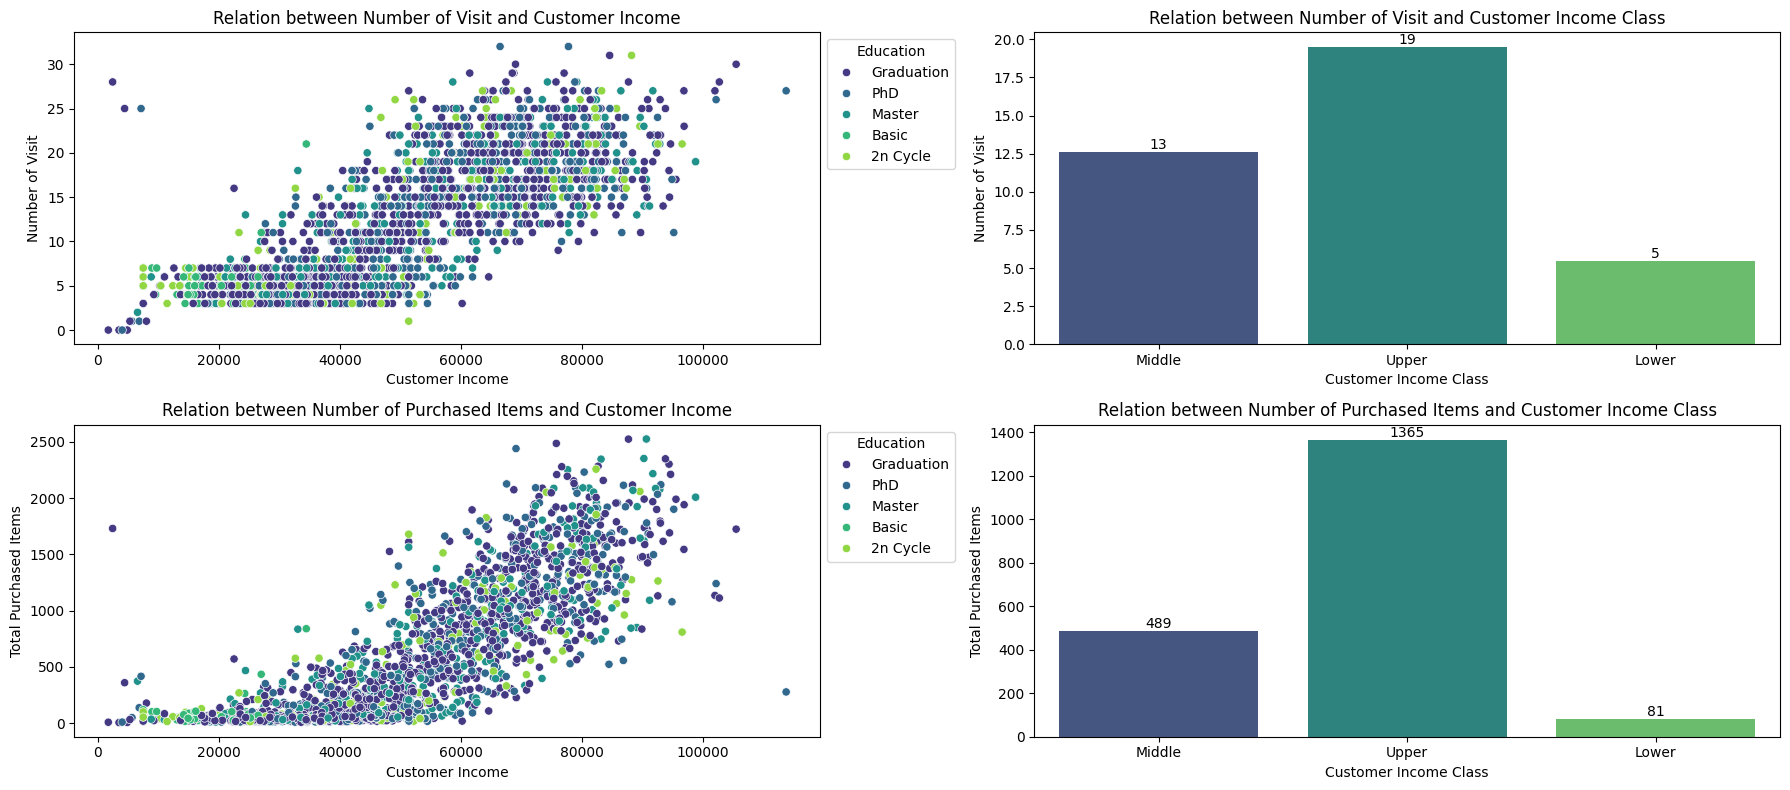

In [77]:
plt.figure(figsize=(18, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=dfClean,
            x= 'Income',
            y='NumOfPurchases',
            hue='Education',
            palette='viridis')

plt.title("Relation between Number of Visit and Customer Income")
plt.ylabel('Number of Visit')
plt.xlabel('Customer Income')
plt.legend(bbox_to_anchor=(1, 1),  title = 'Education')

plt.subplot(2, 2, 2)
sns.barplot(data=dfClean,
            x= 'Income_Class',
            y='NumOfPurchases',
            hue= 'Income_Class',
            ci= 0,
            palette='viridis')

plt.title("Relation between Number of Visit and Customer Income Class")
plt.ylabel('Number of Visit')
plt.xlabel('Customer Income Class')

ax = plt.gca()
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 5),
                    textcoords='offset points')
    
plt.subplot(2, 2, 3)
sns.scatterplot(data=dfClean,
            x= 'Income',
            y='MntTotalPurchase',
            hue='Education',
            palette='viridis')

plt.title("Relation between Number of Purchased Items and Customer Income")
plt.ylabel('Total Purchased Items')
plt.xlabel('Customer Income')
plt.legend(bbox_to_anchor=(1, 1), title = 'Education')

plt.subplot(2, 2, 4)
sns.barplot(data=dfClean,
            x= 'Income_Class',
            y='MntTotalPurchase',
            hue= 'Income_Class',
            ci= 0,
            palette='viridis')

plt.title("Relation between Number of Purchased Items and Customer Income Class")
plt.ylabel('Total Purchased Items')
plt.xlabel('Customer Income Class')

ax = plt.gca()
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

#### Analysis
1. Half of the customer base is inside the middle income bracket.
2. The Education of the customer doesn't affect the frequency of store visits
3. Upper class customers which has an income above the 75 percentile overall scored highest in both categories
4. Majority of the customers has a degree of some kind (Graduation)
5. It is shown that the number of purchased items increases when the income is higher

### Status relation to the number of visit and total purchase

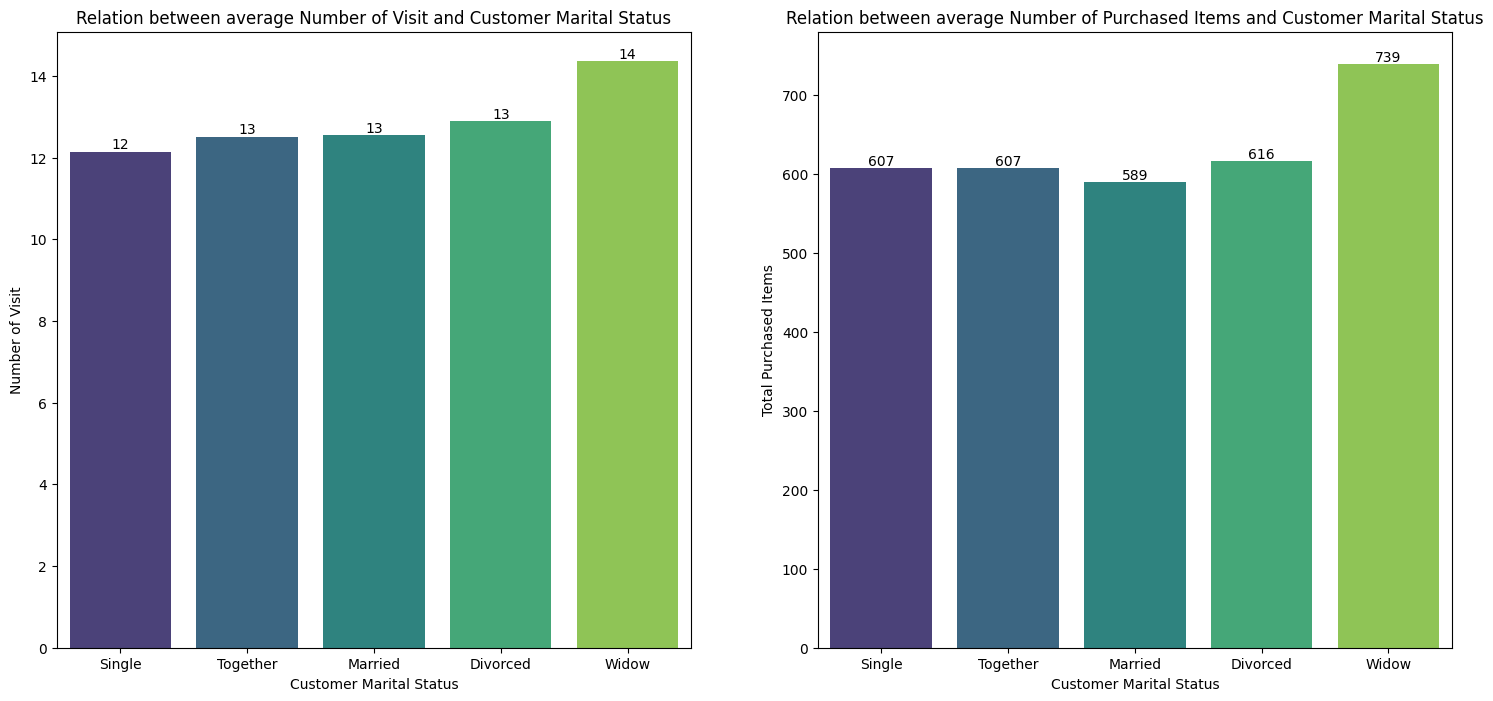

In [78]:
plt.figure(figsize=(18, 8))

plt.subplot(1,2,1)
sns.barplot(data=dfClean, x= 'Marital_Status',
            y='NumOfPurchases',
            hue= 'Marital_Status',
            ci=0,
            palette='viridis')

plt.title("Relation between average Number of Visit and Customer Marital Status")
plt.ylabel('Number of Visit')
plt.xlabel('Customer Marital Status')

ax = plt.gca()
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 5),
                    textcoords='offset points')
    
plt.subplot(1,2,2)
sns.barplot(data=dfClean, x= 'Marital_Status',
            y='MntTotalPurchase',
            hue= 'Marital_Status',
            ci=0,
            palette='viridis')

plt.title("Relation between average Number of Purchased Items and Customer Marital Status")
plt.ylabel('Total Purchased Items')
plt.xlabel('Customer Marital Status')

ax = plt.gca()
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.show()

#### Analysis
1. From the graph it is shown that in both categories of number of visit and amount purchased, widowed customer rank the highest
2. While married customers purchased the least amount while visiting the supermarket more on average than single customers

### Product analysis

#### Method of purchase

In [79]:
index_values = ['Total Purchases']
dfMethod = pd.DataFrame(index=index_values)

dfMethod['Website'] = dfClean['NumWebPurchases'].sum()
dfMethod['Catalog'] = dfClean['NumCatalogPurchases'].sum()
dfMethod['Store'] = dfClean['NumStorePurchases'].sum()

dfMethod = dfMethod.T
dfMethod

,Total Purchases
Website,9139
Catalog,5877
Store,12956


In [80]:
totPurc = dfClean['NumWebPurchases'].sum() + dfClean['NumCatalogPurchases'].sum() + dfClean['NumStorePurchases'].sum()

print('Total purchase frequency:', totPurc)

Total purchase frequency: 27972


#### Graph

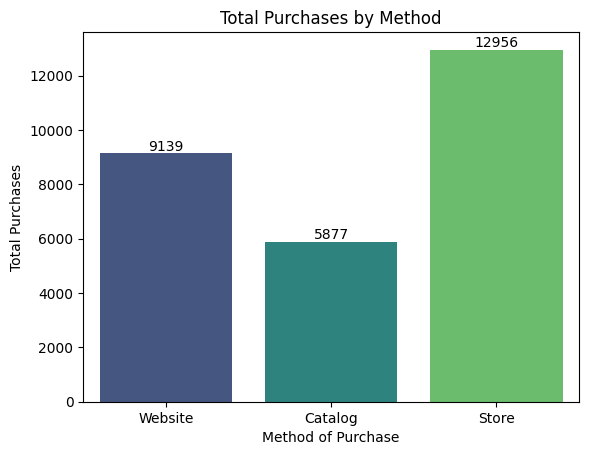

In [81]:
ax = sns.barplot(data=dfMethod, x= dfMethod.index,
            y='Total Purchases',
            hue= dfMethod.index,
            ci=0,
            palette='viridis')

plt.title('Total Purchases by Method')
plt.xlabel('Method of Purchase')
plt.ylabel('Total Purchases')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [82]:
strPer = int(dfClean['NumStorePurchases'].sum() / totPurc * 100)
print('Percentage of in store customer:', strPer, '%')

Percentage of in store customer: 46 %


#### Analysis

- Most of the customers still go to a brick and mortar store to purchase their groceries.
- On the other hand, catalog is the worst performing method of purchase.

#### Purchased items

In [83]:
index_values = ['Total Items']
dfItems = pd.DataFrame(index=index_values)

dfItems['Wines'] = dfClean['MntWines'].sum()
dfItems['Fruits'] = dfClean['MntFruits'].sum()
dfItems['Meat'] = dfClean['MntMeatProducts'].sum()
dfItems['Fish'] = dfClean['MntFishProducts'].sum()
dfItems['Sweet'] = dfClean['MntSweetProducts'].sum()
dfItems['Gold'] = dfClean['MntGoldProds'].sum()

dfItems = dfItems.T
dfItems

,Total Items
Wines,679826
Fruits,58731
Meat,368418
Fish,83905
Sweet,60543
Gold,98328


In [84]:
ItemTotal = dfClean['MntWines'].sum() + dfClean['MntFruits'].sum() + dfClean['MntMeatProducts'].sum() + dfClean['MntFishProducts'].sum() + dfClean['MntSweetProducts'].sum() + dfClean['MntGoldProds'].sum()
print('Total purchased item:', ItemTotal)

Total purchased item: 1349751


#### Graph

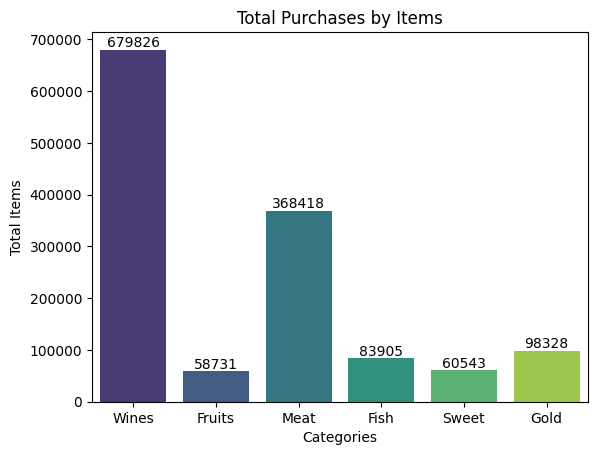

In [85]:
ax = sns.barplot(data=dfItems, x= dfItems.index,
            y='Total Items',
            hue= dfItems.index,
            ci=0,
            palette='viridis')

plt.title('Total Purchases by Items')
plt.xlabel('Categories')
plt.ylabel('Total Items')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [86]:
winePer = int(dfClean['MntWines'].sum() / ItemTotal * 100)
print('Wine Overall Purchase Percentage:', winePer, '%')

Wine Overall Purchase Percentage: 50 %


#### Demographic

In [87]:
wine = dfClean['MntWines'].sort_values(ascending=False)
wine_df = dfClean.loc[wine.index, ['Income_Class', 'Education', 'Age_Group', 'Marital_Status']].value_counts().head()
result_wine = wine_df.reset_index()

result_wine

,Income_Class,Education,Age_Group,Marital_Status,count
0,Middle,Graduation,Adult,Married,191
1,Middle,Graduation,Adult,Together,118
2,Lower,Graduation,Adult,Married,101
3,Middle,PhD,Adult,Married,96
4,Middle,Graduation,Adult,Single,96


#### Analysis

- From the graph it is shown that Wine is the most popular product and meat came second.
- The highest purchaser of wine is in the middle class income bracket and around the age working age of 24 - 65, who is married.
- While Fruits are the worst performing product overall.

### Campaign Acceptance (each iteration) compared to other factors

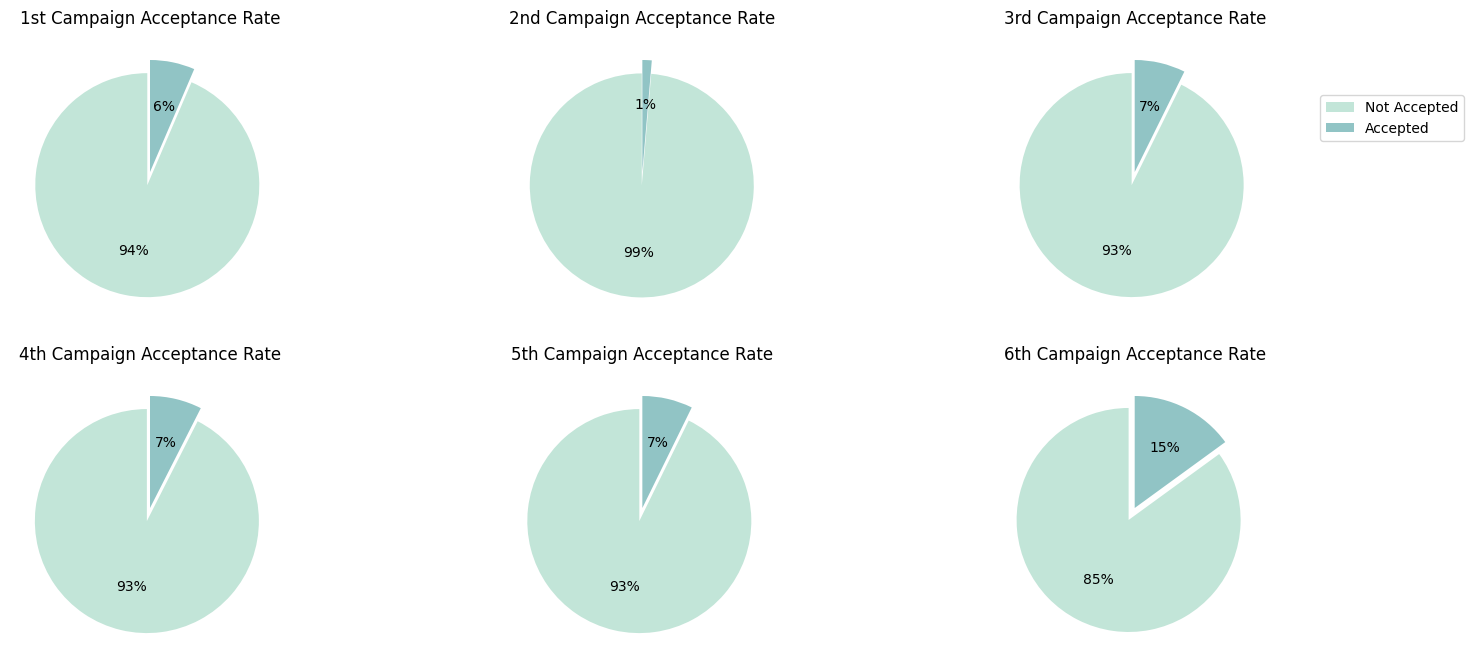

In [88]:
campaignColumns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

plt.figure(figsize=(18, 8))

for i, campaignColumn in enumerate(campaignColumns, start=1):
    plt.subplot(2, 3, i)
    plt.pie(dfClean[campaignColumn].value_counts(),
            autopct='%.f%%',
            colors=sns.cubehelix_palette(start=.5, rot=-.5),
            startangle=90,
            explode=[0.12, 0])
    plt.title(f'{i}{"st" if i==1 else "nd" if i==2 else "rd" if i==3 else "th"} Campaign Acceptance Rate')

plt.legend(labels=['Not Accepted', 'Accepted'],
           bbox_to_anchor=(1.7, 2))

plt.show()

#### Analysis
- From the pie chart, we can surmise that the acceptance rate across 6 campaigns is around 7% on average.
- It is also shown that the least successful campaign is the 2nd Campaign which stands at 2% acceptance rate.
- While the most successfull campaign is the Latest or the 6th Campaign at 15% acceptance rate

### Demographic Response

In [89]:
result = dfClean[dfClean['Accepted_Rate'] > 0][['Income_Class', 'Education', 'Age_Group', 'Marital_Status']].value_counts().head(5)
result_df = result.reset_index()
result_df

,Income_Class,Education,Age_Group,Marital_Status,count
0,Upper,Graduation,Adult,Married,45
1,Middle,Graduation,Adult,Married,39
2,Upper,Graduation,Adult,Together,32
3,Middle,Graduation,Adult,Single,29
4,Middle,PhD,Adult,Married,23


In [90]:
result = dfClean[dfClean['NumDealsPurchases'] > 0][['Income_Class', 'Education', 'Age_Group', 'Marital_Status']].value_counts().head(5)
result_df = result.reset_index()
result_df

,Income_Class,Education,Age_Group,Marital_Status,count
0,Middle,Graduation,Adult,Married,191
1,Middle,Graduation,Adult,Together,118
2,Lower,Graduation,Adult,Married,99
3,Middle,PhD,Adult,Married,96
4,Middle,Graduation,Adult,Single,95


#### Analysis

- The demographic that has the best response overall to the campaign is an adult that has an upper class income which is married and has a degree.
- The customer base that purchases when there are deals, is an adult which is in a relationship and from a middle class income. 

# Outcome

In [91]:
dfClean

,ID,Customer_Join_Date,Year_Birth,Customer_Join_Age,Age_Group,Education,Income_Class,Marital_Status,Income,Kidhome,Teenhome,Childrenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotalPurchase,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumOfPurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Accepted_Rate,NumDealsPurchases,Complain
0,5524,2012-09-04,1957,55,Adult,Graduation,Middle,Single,58138,0,0,0,58,635,88,546,172,88,88,1617,8,10,4,22,7,0,0,0,0,0,1,1,3,0
1,2174,2014-03-08,1954,60,Adult,Graduation,Middle,Single,46344,1,1,2,38,11,1,6,2,1,6,27,1,1,2,4,5,0,0,0,0,0,0,0,2,0
2,4141,2013-08-21,1965,48,Adult,Graduation,Upper,Together,71613,0,0,0,26,426,49,127,111,21,42,776,8,2,10,20,4,0,0,0,0,0,0,0,1,0
3,6182,2014-02-10,1984,30,Adult,Graduation,Lower,Together,26646,1,0,1,26,11,4,20,10,3,5,53,2,0,4,6,6,0,0,0,0,0,0,0,2,0
4,5324,2014-01-19,1981,33,Adult,PhD,Middle,Married,58293,1,0,1,94,173,43,118,46,27,15,422,5,3,6,14,5,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2013-06-13,1967,46,Adult,Graduation,Middle,Married,61223,0,1,1,46,709,43,182,42,118,247,1341,9,3,4,16,5,0,0,0,0,0,0,0,2,0
2236,4001,2014-06-10,1946,68,Old,PhD,Middle,Together,64014,2,1,3,56,406,0,30,0,0,8,444,8,2,5,15,7,1,0,0,0,0,0,1,7,0
2237,7270,2014-01-25,1981,33,Adult,Graduation,Middle,Divorced,56981,0,0,0,91,908,48,217,32,12,24,1241,2,3,13,18,6,0,0,0,1,0,0,1,1,0
2238,8235,2014-01-24,1956,58,Adult,Master,Upper,Together,69245,0,1,1,8,428,30,214,80,30,61,843,6,5,10,21,3,0,0,0,0,0,0,0,2,0


In [92]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2229 non-null   int64         
 1   Customer_Join_Date   2229 non-null   datetime64[ns]
 2   Year_Birth           2229 non-null   int64         
 3   Customer_Join_Age    2229 non-null   int64         
 4   Age_Group            2229 non-null   object        
 5   Education            2229 non-null   object        
 6   Income_Class         2229 non-null   object        
 7   Marital_Status       2229 non-null   object        
 8   Income               2229 non-null   int64         
 9   Kidhome              2229 non-null   int64         
 10  Teenhome             2229 non-null   int64         
 11  Childrenhome         2229 non-null   int64         
 12  Recency              2229 non-null   int64         
 13  MntWines             2229 non-null   i

# Conclusion

1. What are the demographic characteristics is the primary customer base? (age, income, household size, etc.)
    - Most popular demographic is the customer with an age range of 24-65, in the middle class income bracket, is married, has 1 child and has graduated.

2. Which products are the most and least popular and what is the prefered way of purchase by customers?
    - The most popular product by far was wine, which account for half of the total item purchased in the supermarket. It is also the highest sought after product in the customer base with 24-65 years of age bracket, who is married and has a middle class income.
    - While fruits are the least popular product overall in all demographics

3. Which customer base responds well to the past promotional campaigns?
    - When creating a new campaign, it is better to target the most responsive customer demographic, which has an age range of 24-65, in the upper class income bracket, are married and have graduated.

# Recommendation

Improving customer response to the campaign, several steps could be taken by the company.
1. By utilizing the dominant customer base, a more inclusive marketing strategy could be developed that relates to customers that is in the working age and in a relationship.
    - The campaign could also be targeted to kids which in turn will affect the parents.
2. To improve the company's bottomline, under performing products could be substituted for a different and more appealing product, after more market research is conducted.

3. Another way to improve sales is to give more variance to the product in question, so that customers has more choices and this will improve the customer engagement with the product by giving them multiple options to choose from, rather than not buying the product.

4. The next campaign could also be tailor in a specific date in relation to a public holiday to improve engagement of the customer base, which need more market research.
    - It is also a good way to sell under performing products, which will cost the company revenue.

In [93]:
dfClean.to_csv('Supermarket Customer Analysis - Kresna Kumbara.csv')